# Importing Libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")


# Importing Dataset

In [ ]:
#loading the file
df=pd.read_csv('/content/drive/MyDrive/Insurance_Data (1).csv')

In [ ]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df1=df.copy()

In [ ]:
#Summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
#number od rows and columns
row = df.shape[0]
col=df.shape[1]
print(f"The dataset contains {row} rows and {col} columns")

The dataset contains 58592 rows and 44 columns


In [ ]:
#checking for duplicate records
df.duplicated().sum()

0

In [ ]:
#Examining target columns
df['is_claim'].value_counts()


0    54844
1     3748
Name: is_claim, dtype: int64

Dataset is imbalanced

In [ ]:
df['is_claim'].value_counts()/row


0    0.936032
1    0.063968
Name: is_claim, dtype: float64

93% of the dataset is record of people who doesnt claim the insurance


In [ ]:
#Analysing and comparing statistical summary of target classes
df.groupby('is_claim').describe().T

is_claim                        0            1
policy_tenure count  54844.000000  3748.000000
              mean       0.602720     0.736002
              std        0.414444     0.389169
              min        0.002735     0.002850
              25%        0.199878     0.399630
...                           ...          ...
ncap_rating   min        0.000000     0.000000
              25%        0.000000     0.000000
              50%        2.000000     2.000000
              75%        3.000000     3.000000
              max        5.000000     5.000000

[120 rows x 2 columns]

# Undersample the dataset

In [ ]:
df_0=df[df['is_claim']==0]
df_1=df[df['is_claim']==1]
df_0=df_0.sample(df_1.shape[0])
df=pd.concat([df_0,df_1],ignore_index=True)

In [ ]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID19011,1.016332,0.16,0.721154,C8,8794,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
1,ID17738,0.933516,0.01,0.500000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID11147,0.099122,0.18,0.432692,C2,27003,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
3,ID58255,1.077930,0.15,0.326923,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID09340,0.273034,0.11,0.365385,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,ID58560,0.484333,0.12,0.596154,C8,8794,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
7492,ID58568,1.148102,0.04,0.451923,C12,34791,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
7493,ID58574,0.151652,0.00,0.365385,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,1
7494,ID58575,0.278499,0.07,0.557692,C13,5410,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         7496 non-null   object 
 1   policy_tenure                     7496 non-null   float64
 2   age_of_car                        7496 non-null   float64
 3   age_of_policyholder               7496 non-null   float64
 4   area_cluster                      7496 non-null   object 
 5   population_density                7496 non-null   int64  
 6   make                              7496 non-null   int64  
 7   segment                           7496 non-null   object 
 8   model                             7496 non-null   object 
 9   fuel_type                         7496 non-null   object 
 10  max_torque                        7496 non-null   object 
 11  max_power                         7496 non-null   object 
 12  engine

Max_power and max_torque are supposed to be numerical values but it is showing as object data type


# Column Transformation

In [ ]:
#checking max_power column
df['max_power'].sample(1)

6880    88.77bhp@4000rpm
Name: max_power, dtype: object

In [ ]:
#checking max_torque column
df['max_torque'].sample(1)

5517    200Nm@1750rpm
Name: max_torque, dtype: object

In [ ]:
#function to find out alpha values from the columns
def unit(df):
  x=df.str.findall('[a-zA-Z]+')
  patt=[i for i in x[0]]
  return patt



In [ ]:
unit_power=unit(df['max_power'])
print(f'unit of power is {unit_power[0]}@{unit_power[1]}')


unit of power is bhp@rpm


In [ ]:
unit_torque=unit(df['max_torque'])
print(f'unit of torque is {unit_torque[0]}@{unit_torque[1]}')

unit of torque is Nm@rpm


In [ ]:
df['max_power'].sample(1)

163    40.36bhp@6000rpm
Name: max_power, dtype: object

In [ ]:
#function to convert the alphanumeric values of the columns to numeric values
def convert_power_torque(x):
  x=x.split('@')
  if 'bhp' in x[0]:
     x[0]=x[0].strip('bhp')
  elif 'Nm' in x[0]:
    x[0]=x[0].strip('Nm')
  x[1]=x[1].strip('rpm')
  return float(x[0])/float(x[1])


In [ ]:
df['max_power']=df['max_power'].apply(convert_power_torque)

In [ ]:
df['max_torque']=df['max_torque'].apply(convert_power_torque)

In [ ]:
#checking the max_power column
df['max_power'].sample(1)

7232    0.006727
Name: max_power, dtype: float64

In [ ]:
#checking max_torque column
df['max_torque'].sample(1)

406    0.025682
Name: max_torque, dtype: float64

In [ ]:
#checking for missing values
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

No misssing values

In [ ]:
#dividing categorical and numerical values
cat=[]
num=[]
for col in df.columns:
  if df[col].dtype==object :
    cat.append(col)
  else:
    num.append(col)

In [ ]:
#removing target column from the list of numerical vcolumns
num.remove('is_claim')

In [ ]:
#finding out number of uniques values from all categorical columns
df[cat].nunique()

policy_id                           7496
area_cluster                          22
segment                                6
model                                 11
fuel_type                              3
engine_type                           11
is_esc                                 2
is_adjustable_steering                 2
is_tpms                                2
is_parking_sensors                     2
is_parking_camera                      2
rear_brakes_type                       2
transmission_type                      2
steering_type                          3
is_front_fog_lights                    2
is_rear_window_wiper                   2
is_rear_window_washer                  2
is_rear_window_defogger                2
is_brake_assist                        2
is_power_door_locks                    2
is_central_locking                     2
is_power_steering                      2
is_driver_seat_height_adjustable       2
is_day_night_rear_view_mirror          2
is_ecw          

In [ ]:
#droping policy_id
df.drop('policy_id',axis=1,inplace=True)
cat.remove('policy_id')

In [ ]:
#checking number of uniques values in numerical columns
df[num].nunique()

policy_tenure          7496
age_of_car               38
age_of_policyholder      67
population_density       22
make                      5
max_torque                9
max_power                 9
airbags                   3
displacement              9
cylinder                  2
gear_box                  2
turning_radius            9
length                    9
width                    10
height                   11
gross_weight             10
ncap_rating               5
dtype: int64

make,max_torque,max_power,airbags,cylinder,gear_box,turning_radius,gross_weight,height,population_density are having very less number of unique values indicates these features have relation with some categorical columns
and maybe they are related to each other

# **Univariate Analysis**


## Analysing distribution plot of numerical features

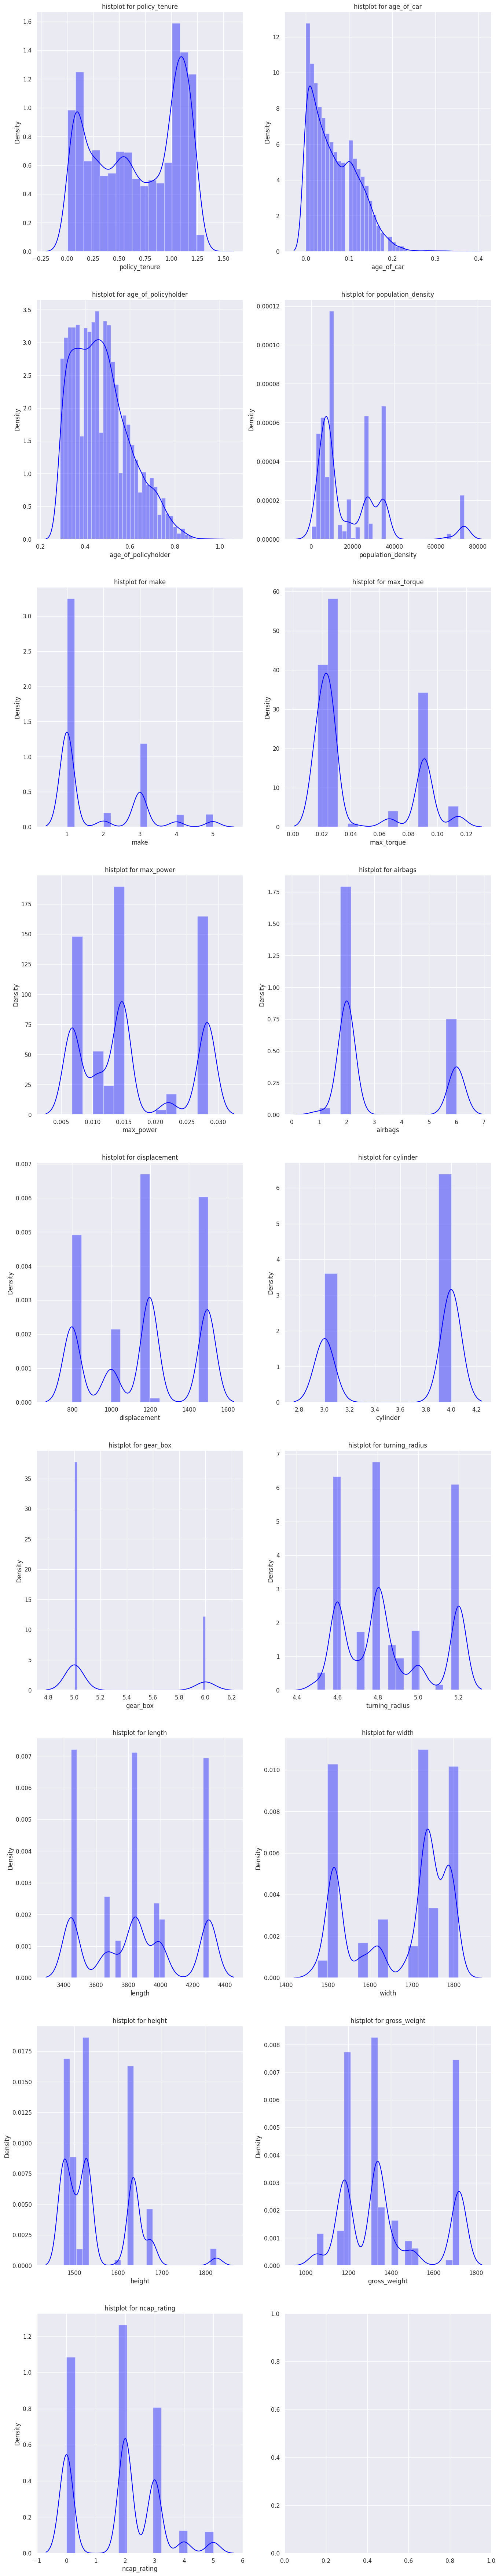

In [ ]:
rows=(len(num)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(num):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.distplot(df[col],ax=ax,kde=True,color='blue')
    ax.set_title(f'histplot for {col}')

none of the features follow normal distribution

In [ ]:
#checking skewness of numerical columns
for i in num:
    print(f'{i}: {df[i].skew()}')


policy_tenure: -0.1678063245629338
age_of_car: 0.8271447985192952
age_of_policyholder: 0.6481600831346223
population_density: 1.7314779759146866
make: 1.1953479325699439
max_torque: 0.9276520039668952
max_power: 0.4461253111551749
airbags: 0.9040267404745297
displacement: -0.1322455639646614
cylinder: -0.5783637934135165
gear_box: 1.1906795593525092
turning_radius: 0.4128603852971343
length: 0.12365716978668559
width: -0.5360134455641068
height: 1.0611938123579632
gross_weight: 0.5408872407015102
ncap_rating: 0.08215596785392192


## Plotting Countplot for features with yes/no values

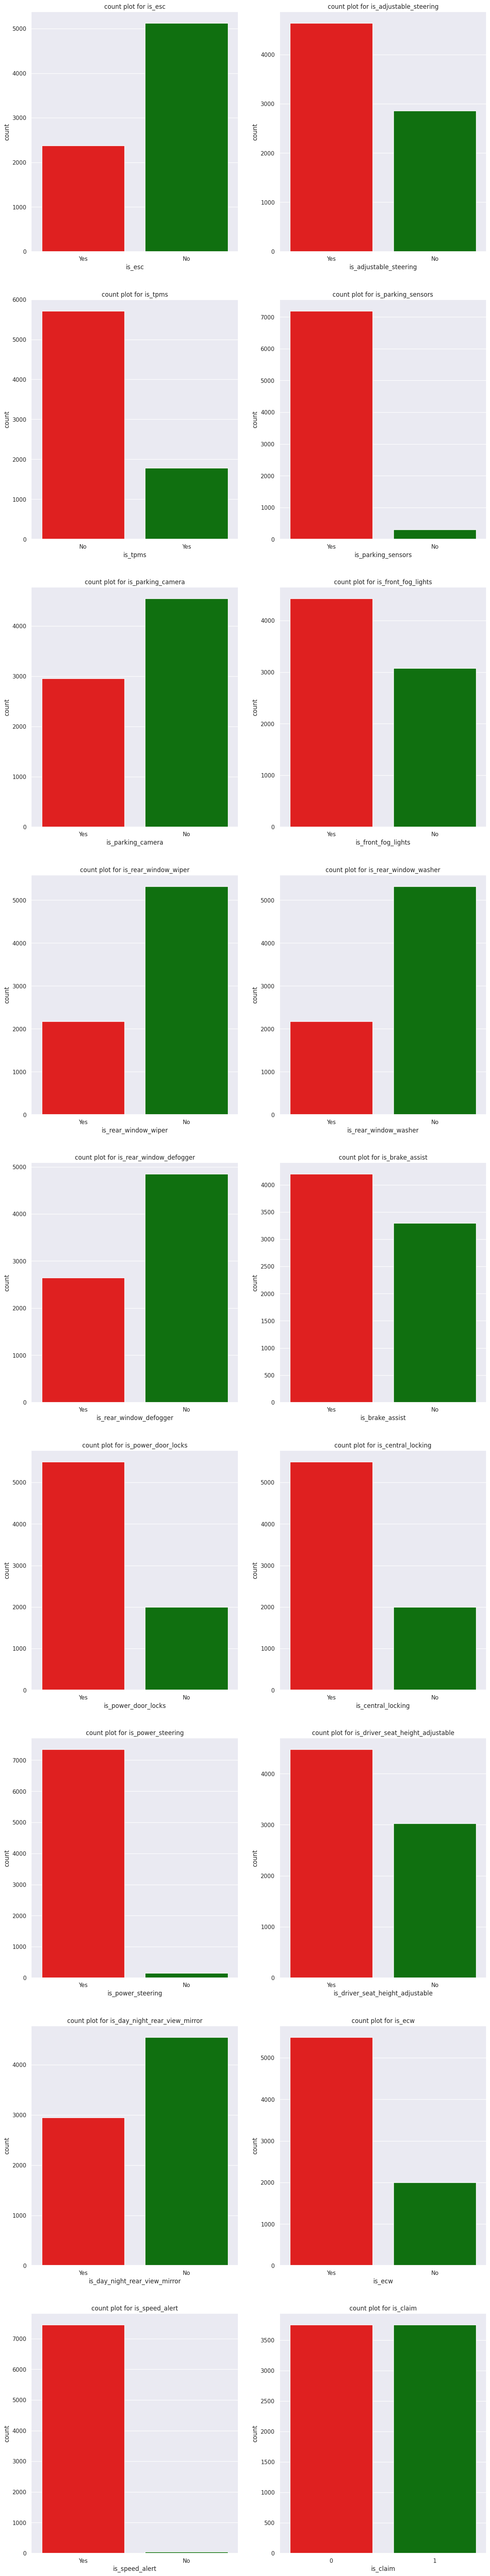

In [ ]:
bin=[i for i in df.columns if i.startswith('is')]
rows=(len(bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=col,data=df,ax=ax,palette=['red',"green"])
    ax.set_title(f'count plot for {col}')

- is_parking_sensors,is_power_steering ans is_speed_alert features have very high yes to no ratio

## Plotting countplot for rest of the categorical features


In [ ]:
#creating list of columns which doesn't include yes/no features
non_bin=[i for i in cat if i not in bin]

In [ ]:
#checking number of uniques values in these columns
df[non_bin].nunique()

area_cluster         22
segment               6
model                11
fuel_type             3
engine_type          11
rear_brakes_type      2
transmission_type     2
steering_type         3
dtype: int64

Area cluster,engine_type and model have more categories comparing to the other columns so these have to plot seperately

<Axes: xlabel='count', ylabel='area_cluster'>

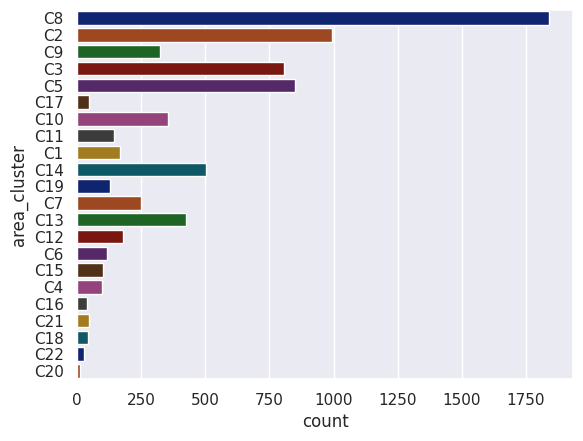

In [ ]:
#plotting countplot for area_cluster
sns.countplot(df['area_cluster'],palette='dark')

In [ ]:
df['area_cluster'].value_counts().sort_values(ascending=False)

C8     1841
C2      994
C5      848
C3      807
C14     503
C13     425
C10     355
C9      324
C7      249
C12     181
C1      166
C11     143
C19     129
C6      117
C15     103
C4       98
C17      46
C21      45
C18      44
C16      39
C22      26
C20      13
Name: area_cluster, dtype: int64

Some classes in area_clusters are having very less count and c8 is having almost double the amount of the proceding class c2


<Axes: xlabel='count', ylabel='engine_type'>

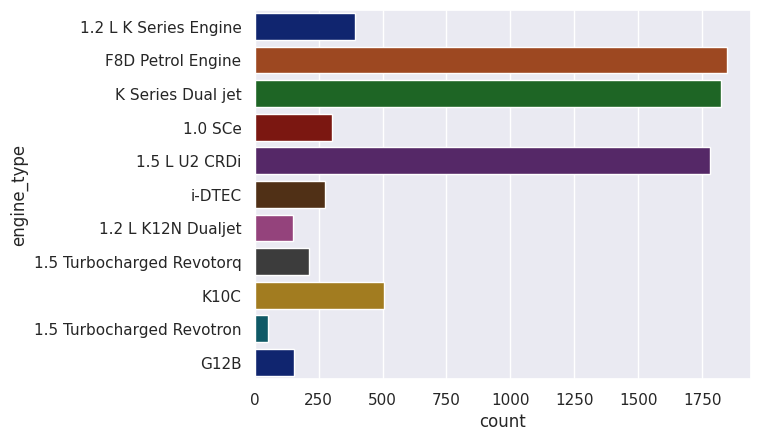

In [ ]:
#plotting countplot for engine_type
sns.countplot(df['engine_type'],palette='dark')

In [ ]:
df['engine_type'].value_counts().sort_values(ascending=False)

F8D Petrol Engine            1848
K Series Dual jet            1825
1.5 L U2 CRDi                1781
K10C                          506
1.2 L K Series Engine         392
1.0 SCe                       303
i-DTEC                        276
1.5 Turbocharged Revotorq     213
G12B                          152
1.2 L K12N Dualjet            150
1.5 Turbocharged Revotron      50
Name: engine_type, dtype: int64

Some categories in engine_type is having very less counts first 3 categories have very high counts comparing to the rest of the categories

<Axes: xlabel='count', ylabel='model'>

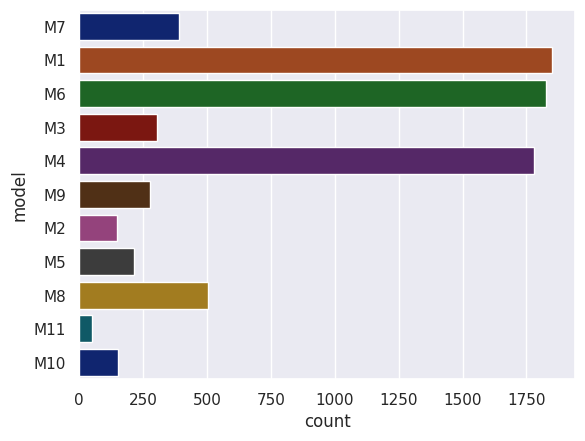

In [ ]:
#plotting countplot for model
sns.countplot(df['model'],palette='dark')

In [ ]:
df['model'].value_counts().sort_values(ascending=False)

M1     1848
M6     1825
M4     1781
M8      506
M7      392
M3      303
M9      276
M5      213
M10     152
M2      150
M11      50
Name: model, dtype: int64

Model and engine type are having same count of values maybe these features related for example: all the cars of model M1 will be having F8D Petrol Engine  

In [ ]:
#updating non_bin list for future analysis
non_bin.remove('area_cluster')
non_bin.remove('engine_type')
non_bin.remove('model')

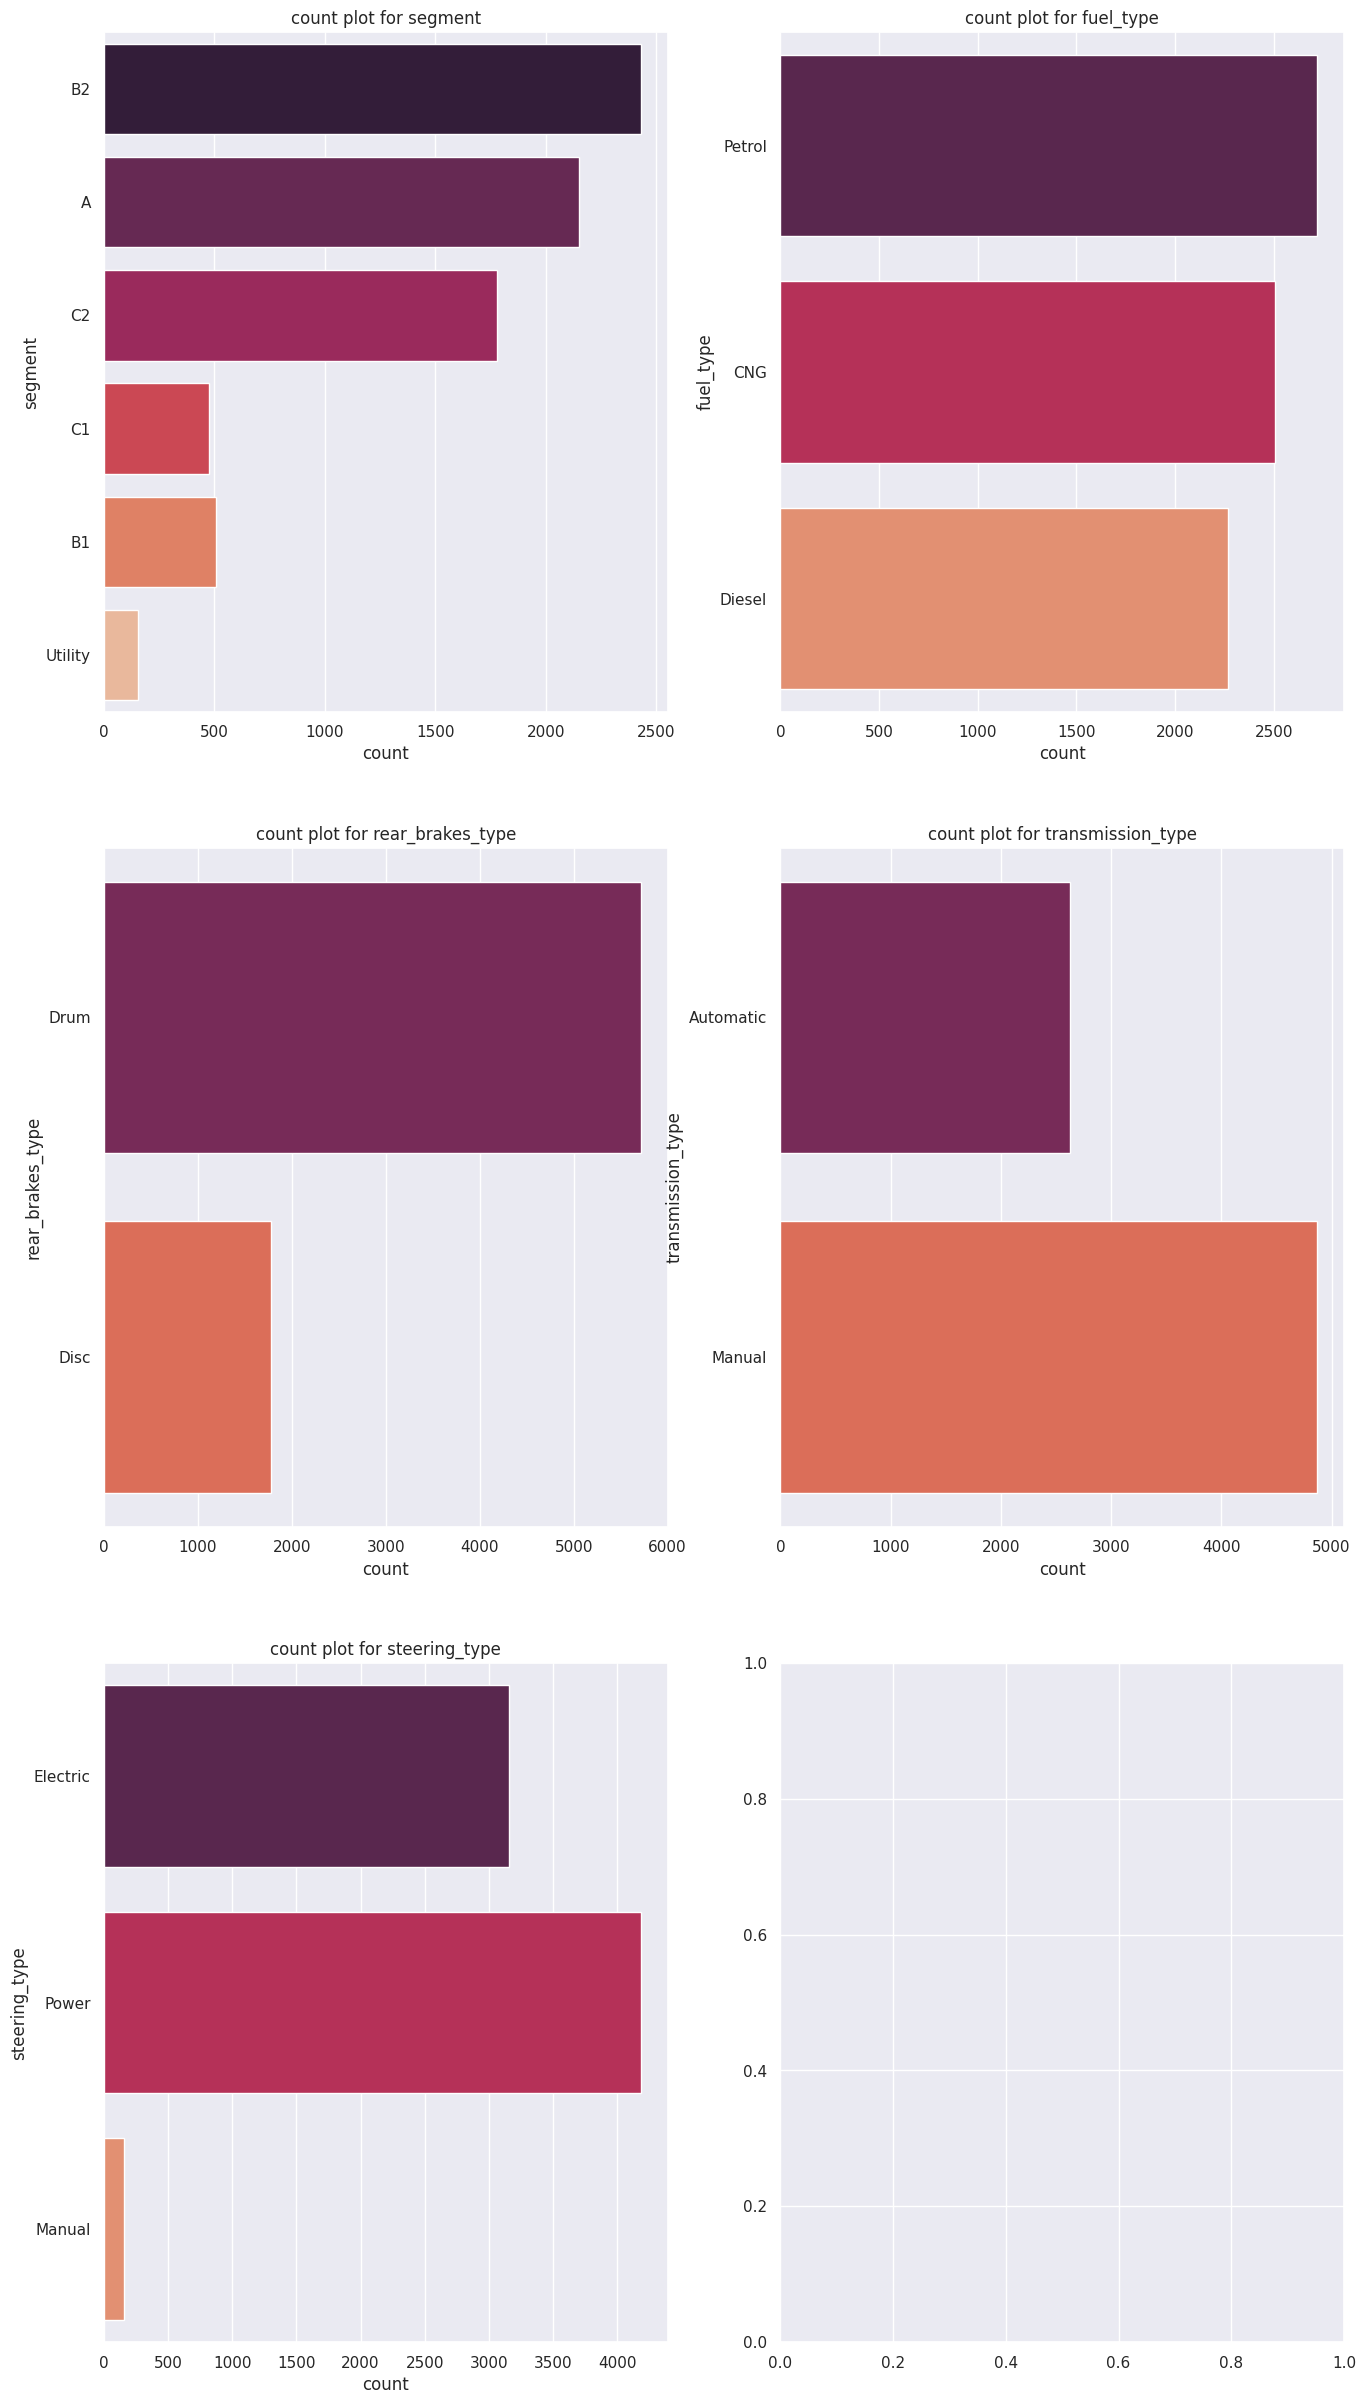

In [ ]:
rows=(len(non_bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(non_bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(df[col],ax=ax,palette='rocket')
    ax.set_title(f'count plot for {col}')

- In segment column A1,B2 and C2 are having high count B1,C2 and utility are very less in number
- In steering type manual is having very less count comparing to rest of the classes in the column


In [ ]:
df['segment'].value_counts()

B2         2430
A          2151
C2         1781
B1          506
C1          476
Utility     152
Name: segment, dtype: int64

In [ ]:
df['steering_type'].value_counts()

Power       4185
Electric    3159
Manual       152
Name: steering_type, dtype: int64

## Outlier Analysis

In [ ]:
#dividing numerical columns to analysis for outlier
lar=[]
med=[]
sm=[]
for i in num:
  if df[i].max()>=100:
    lar.append(i)
  elif df[i].max()>1:
    med.append(i)
  else:
    sm.append(i)

### Plotting Boxplot

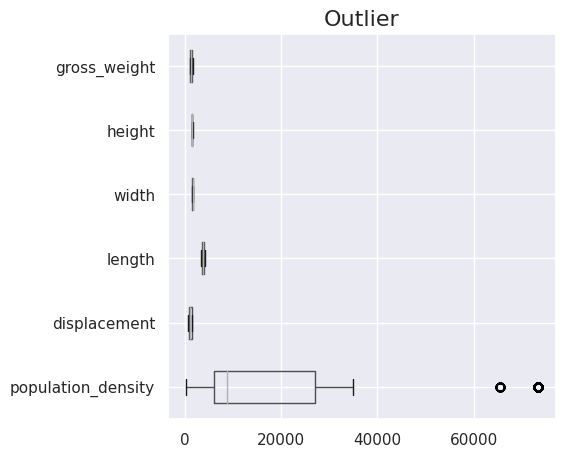

In [ ]:
#plotting columns in the lar list
plt.figure(figsize=(5,5))
df[lar].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

population density has larger values comparing tho othet columns in the list

In [ ]:
#checking max values of the columns in the list
df[lar].max().sort_values()

displacement           1498
gross_weight           1720
width                  1811
height                 1825
length                 4300
population_density    73430
dtype: int64

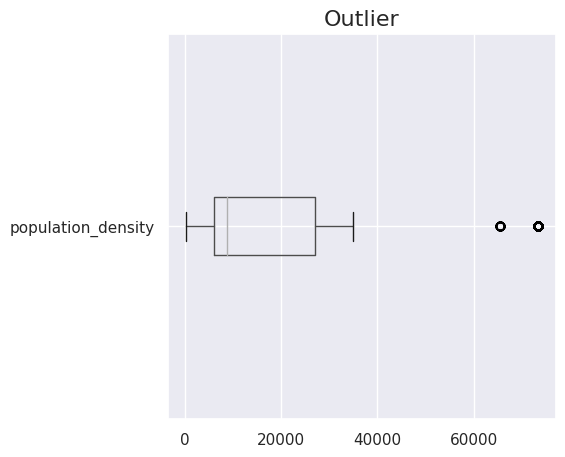

In [ ]:
#analysing population density seperately
plt.figure(figsize=(5,5))
df[['population_density']].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

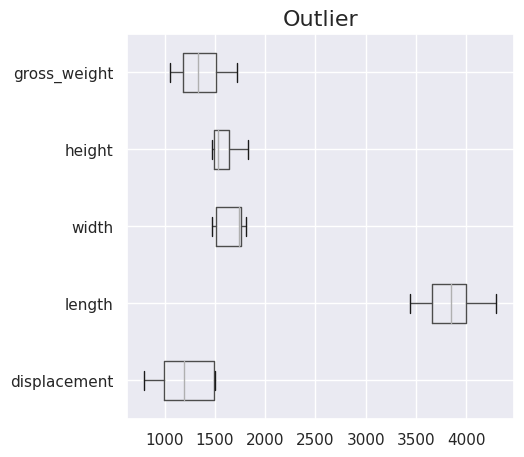

In [ ]:
plt.figure(figsize=(5,5))
df[lar].drop('population_density',axis=1).boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

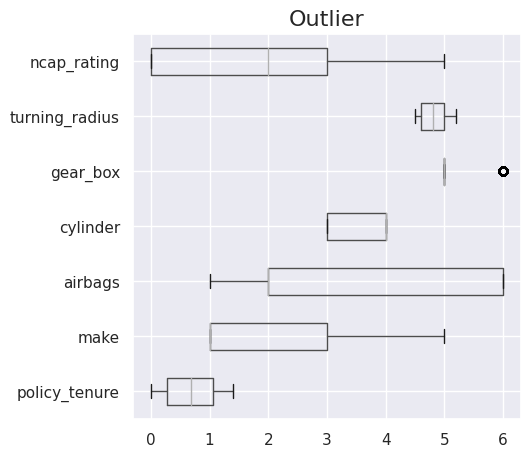

In [ ]:
#Analysing the columns in the list med
plt.figure(figsize=(5,5))
df[med].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()


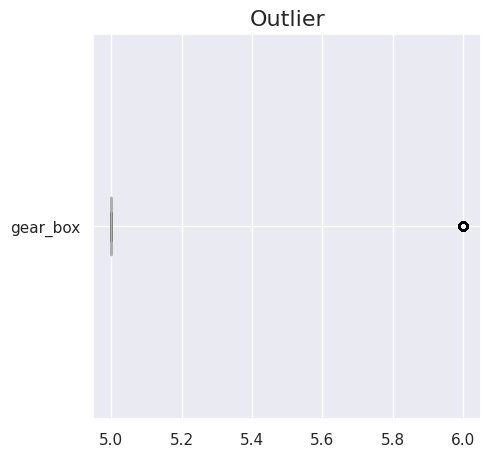

In [ ]:
plt.figure(figsize=(5,5))
df[['gear_box']].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

In [ ]:
df['gear_box'].value_counts()/df.shape[0]

5    0.755736
6    0.244264
Name: gear_box, dtype: float64

number of gears is 5 for 75% of the records and 6 for rest of the records


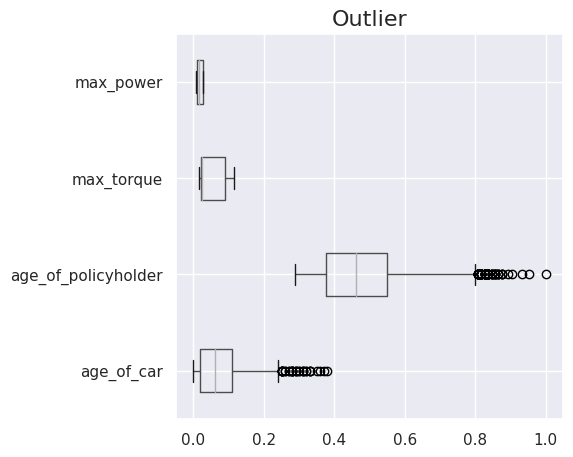

In [ ]:
#checking outliers of  the columns in sm list
plt.figure(figsize=(5,5))
df[sm].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()


### Checking Percentage of outliers in each columns
using IQr method because all the numerical columns are sqewed

In [ ]:
#function to check outliers
def outlier_check(data):
  outlier_col=[]
  for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype=='float64' :
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_range = Q1 - (1.5* IQR)
      upper_range = Q3 + (1.5* IQR)
      print(f'Percentage of outliers in {col} :  {data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0]/df.shape[0]}')
      if data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0] > 0:
        outlier_col.append(col)
  return outlier_col

In [ ]:
#checking outliers in columns from lar list
outlier_check(df[lar])

Percentage of outliers in population_density :  0.053495197438633936
Percentage of outliers in displacement :  0.0
Percentage of outliers in length :  0.0
Percentage of outliers in width :  0.0
Percentage of outliers in height :  0.0
Percentage of outliers in gross_weight :  0.0


['population_density']

In [ ]:
outlier_check(df[med])

Percentage of outliers in policy_tenure :  0.0
Percentage of outliers in make :  0.0
Percentage of outliers in airbags :  0.0
Percentage of outliers in cylinder :  0.0
Percentage of outliers in gear_box :  0.24426360725720384
Percentage of outliers in turning_radius :  0.0
Percentage of outliers in ncap_rating :  0.0


['gear_box']

In [ ]:
outlier_check(df[sm])

Percentage of outliers in age_of_car :  0.004268943436499467
Percentage of outliers in age_of_policyholder :  0.009204909284951974
Percentage of outliers in max_torque :  0.0
Percentage of outliers in max_power :  0.0


['age_of_car', 'age_of_policyholder']

In [ ]:
outlier_cols=outlier_check(df[num])

Percentage of outliers in policy_tenure :  0.0
Percentage of outliers in age_of_car :  0.004268943436499467
Percentage of outliers in age_of_policyholder :  0.009204909284951974
Percentage of outliers in population_density :  0.053495197438633936
Percentage of outliers in make :  0.0
Percentage of outliers in max_torque :  0.0
Percentage of outliers in max_power :  0.0
Percentage of outliers in airbags :  0.0
Percentage of outliers in displacement :  0.0
Percentage of outliers in cylinder :  0.0
Percentage of outliers in gear_box :  0.24426360725720384
Percentage of outliers in turning_radius :  0.0
Percentage of outliers in length :  0.0
Percentage of outliers in width :  0.0
Percentage of outliers in height :  0.0
Percentage of outliers in gross_weight :  0.0
Percentage of outliers in ncap_rating :  0.0


In [ ]:
outlier_col=outlier_check(df[num])

Percentage of outliers in policy_tenure :  0.0
Percentage of outliers in age_of_car :  0.004268943436499467
Percentage of outliers in age_of_policyholder :  0.009204909284951974
Percentage of outliers in population_density :  0.053495197438633936
Percentage of outliers in make :  0.0
Percentage of outliers in max_torque :  0.0
Percentage of outliers in max_power :  0.0
Percentage of outliers in airbags :  0.0
Percentage of outliers in displacement :  0.0
Percentage of outliers in cylinder :  0.0
Percentage of outliers in gear_box :  0.24426360725720384
Percentage of outliers in turning_radius :  0.0
Percentage of outliers in length :  0.0
Percentage of outliers in width :  0.0
Percentage of outliers in height :  0.0
Percentage of outliers in gross_weight :  0.0
Percentage of outliers in ncap_rating :  0.0


# Bivariate Analysis

## Plotting Numerical columns vs target column


In [ ]:
num

In [ ]:
#plotting distplot of numerical records of the target classes seperately
rows=len(num)
fig,axes=plt.subplots(rows,1,figsize=(16,10*rows))
for i,col in enumerate(num):

    ax=axes[i]
    sns.distplot(df[df['is_claim']==0][col],ax=ax,color='red')
    sns.distplot(df[df['is_claim']==1][col],ax=ax,color='green')



policy_tenure has more influence on target columns

## Plotting categorical column vs target column

In [ ]:
#Countplot of  yes/no columns with respect to target column
bin=[i for i in df.columns if i.startswith('is')]
rows=(len(bin)+1)//2
fig,axes=plt.subplots(rows,2,figsize=(16,10*rows))
for i,col in enumerate(bin):
    row=i//2
    col_num=i%2
    ax=axes[row,col_num]
    sns.countplot(x=col,data=df,ax=ax,hue='is_claim',palette=['red',"green"])
    ax.set_title(f'count plot for {col}')

- proportion of people who claimed insurance is almost same for both yes and no

<Axes: xlabel='segment', ylabel='count'>

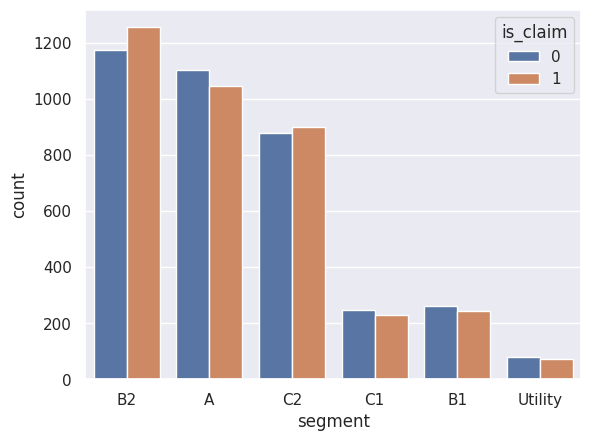

In [ ]:
sns.countplot(x='segment',hue='is_claim',data=df)

<Axes: xlabel='steering_type', ylabel='count'>

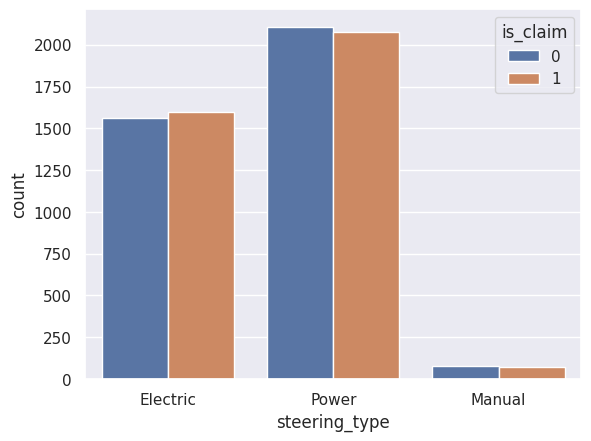

In [ ]:
sns.countplot(x='steering_type',hue='is_claim',data=df)

## Area_cluster and Population_density




<Axes: xlabel='area_cluster', ylabel='population_density'>

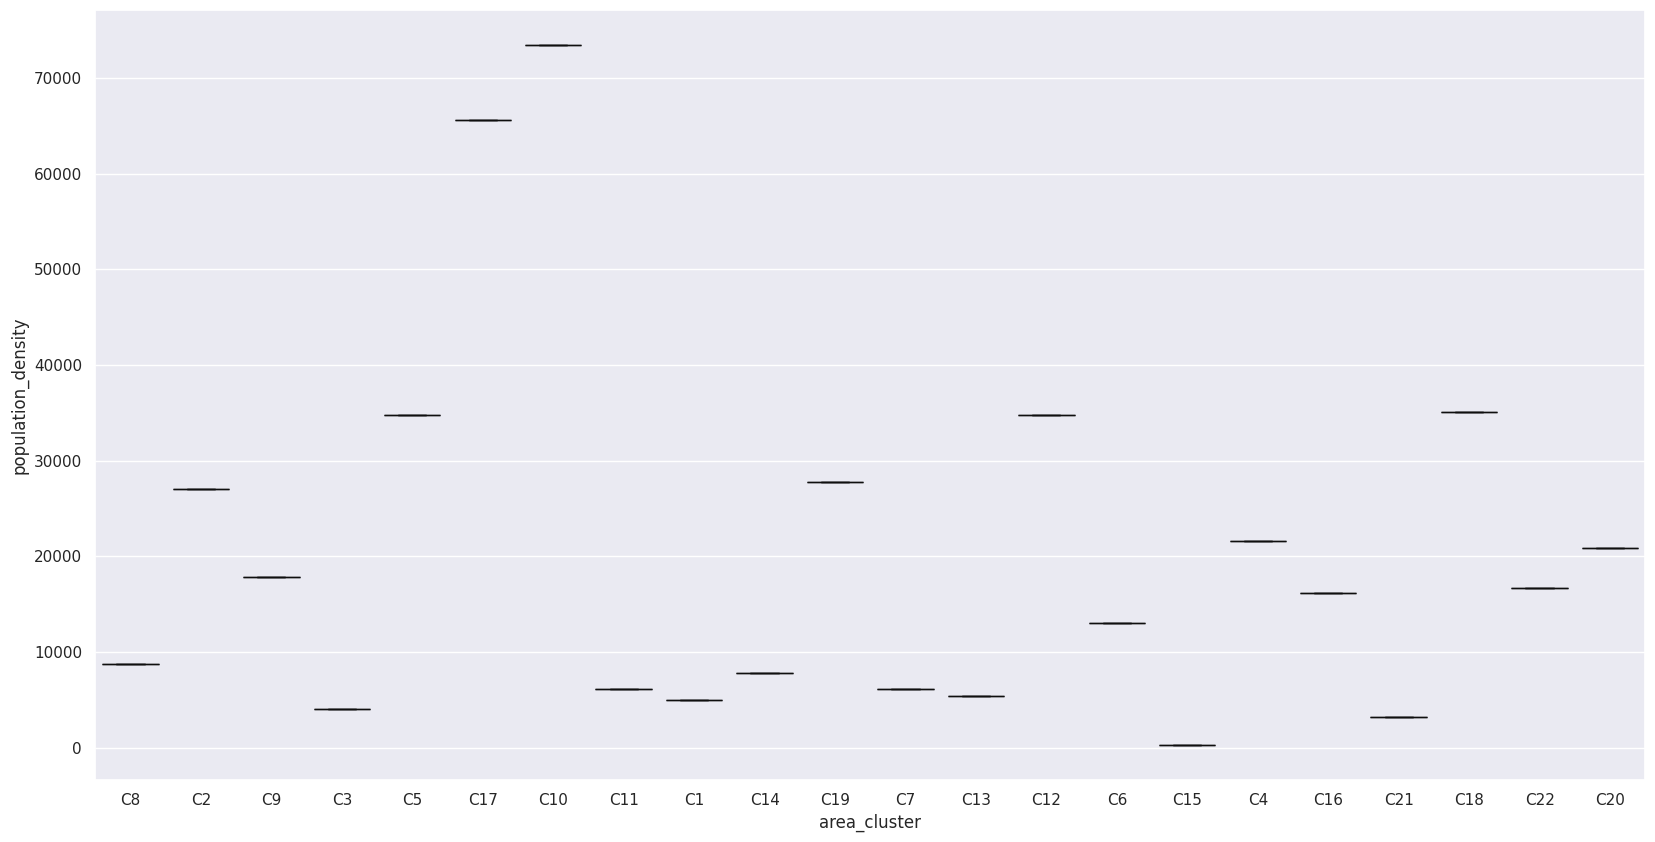

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='area_cluster',y='population_density',data=df,palette='rocket')

In [ ]:
df.groupby('area_cluster')['population_density'].describe()

,count,mean,std,min,25%,50%,75%,max
area_cluster,,,,,,,,
C1,166.0,4990.0,0.0,4990.0,4990.0,4990.0,4990.0,4990.0
C10,355.0,73430.0,0.0,73430.0,73430.0,73430.0,73430.0,73430.0
C11,143.0,6108.0,0.0,6108.0,6108.0,6108.0,6108.0,6108.0
C12,181.0,34791.0,0.0,34791.0,34791.0,34791.0,34791.0,34791.0
C13,425.0,5410.0,0.0,5410.0,5410.0,5410.0,5410.0,5410.0
C14,503.0,7788.0,0.0,7788.0,7788.0,7788.0,7788.0,7788.0
C15,103.0,290.0,0.0,290.0,290.0,290.0,290.0,290.0
C16,39.0,16206.0,0.0,16206.0,16206.0,16206.0,16206.0,16206.0
C17,46.0,65567.0,0.0,65567.0,65567.0,65567.0,65567.0,65567.0


In [ ]:
df.groupby('area_cluster')['population_density'].max().sort_values()

area_cluster
C15      290
C21     3264
C3      4076
C1      4990
C13     5410
C11     6108
C7      6112
C14     7788
C8      8794
C6     13051
C16    16206
C22    16733
C9     17804
C20    20905
C4     21622
C2     27003
C19    27742
C5     34738
C12    34791
C18    35036
C17    65567
C10    73430
Name: population_density, dtype: int64

Cluster is formed based on population density

## Max_torque and Max_power

<Axes: xlabel='max_power', ylabel='max_torque'>

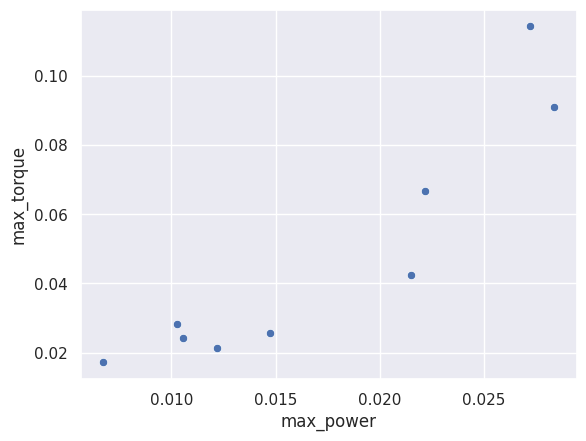

In [ ]:
# plotting relation between max_power and max_torque
sns.scatterplot(x='max_power',y='max_torque',data=df)

<Axes: xlabel='age_of_policyholder', ylabel='age_of_car'>

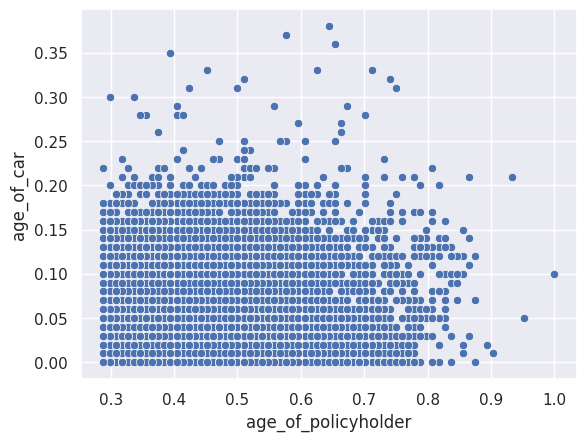

In [ ]:
# plotting relation between max_power and displacement
sns.scatterplot(x='age_of_policyholder',y='age_of_car',data=df)

## Model and Make

<Axes: xlabel='model', ylabel='make'>

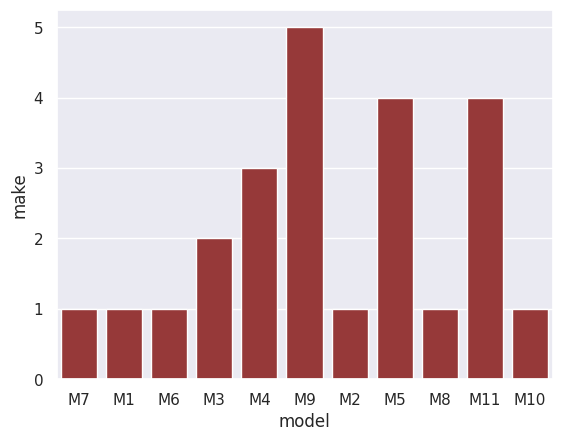

In [ ]:
# plotting relation between make and model
sns.barplot(x='model',y='make',data=df,color='brown')

M1,M8,M10,M2,M6,M7 are made by  manufacturer 1  M5,M11 are made by manufacturer 4 remaining manufacturs have only have one model for each

## gear_box turning radius

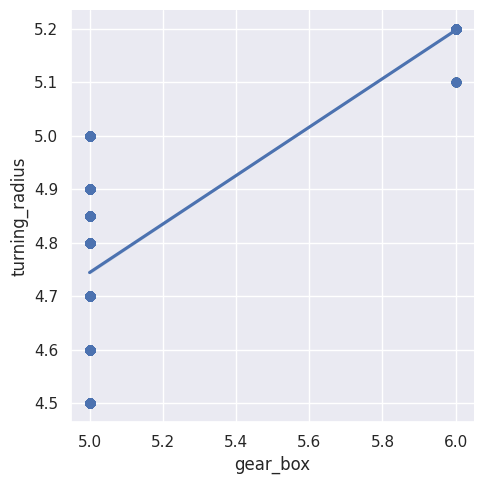

In [ ]:
sns.lmplot(x='gear_box',y='turning_radius',data=df)

turning radius is more for 6 geared car than 5 geared

## Fuel type and engine type

<Figure size 2000x1000 with 0 Axes>

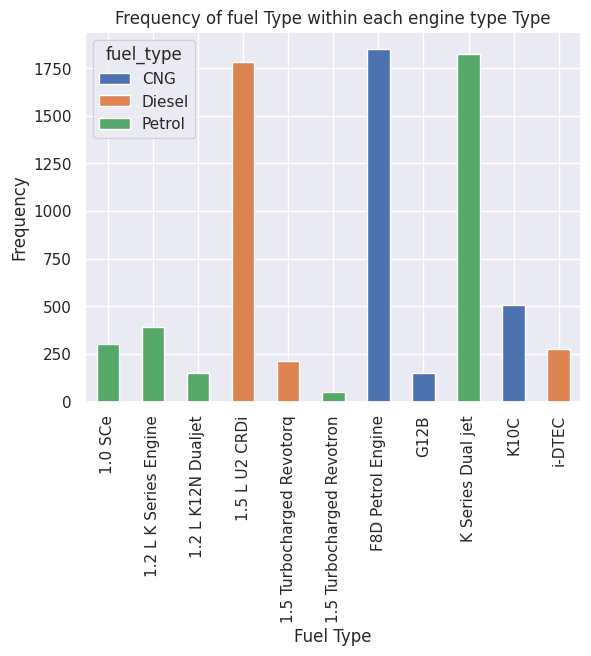

In [ ]:
#plotting between fuel type and engine type
counts = df.groupby(['engine_type', 'fuel_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))

counts.plot(kind='bar',stacked=True)
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Frequency of fuel Type within each engine type Type')
plt.legend(title='fuel_type')
plt.show()

- petrol:1.0 Sce,1.2Lk Series Engine,1.2LK12N Dualjet,1.5 Turbocharger Revotron
- diesel:1.5 L U2 CRDi,1.5 Turbocharged Revotorq,iDTEC
- CNG:F8D Petrol Engine,G12B,K10C

In [ ]:
counts

fuel_type,CNG,Diesel,Petrol
engine_type,,,
1.0 SCe,0,0,303
1.2 L K Series Engine,0,0,392
1.2 L K12N Dualjet,0,0,150
1.5 L U2 CRDi,0,1781,0
1.5 Turbocharged Revotorq,0,213,0
1.5 Turbocharged Revotron,0,0,50
F8D Petrol Engine,1848,0,0
G12B,152,0,0
K Series Dual jet,0,0,1825


- fuel type and engine type follows an one to many relationships

## Model vs Engine type

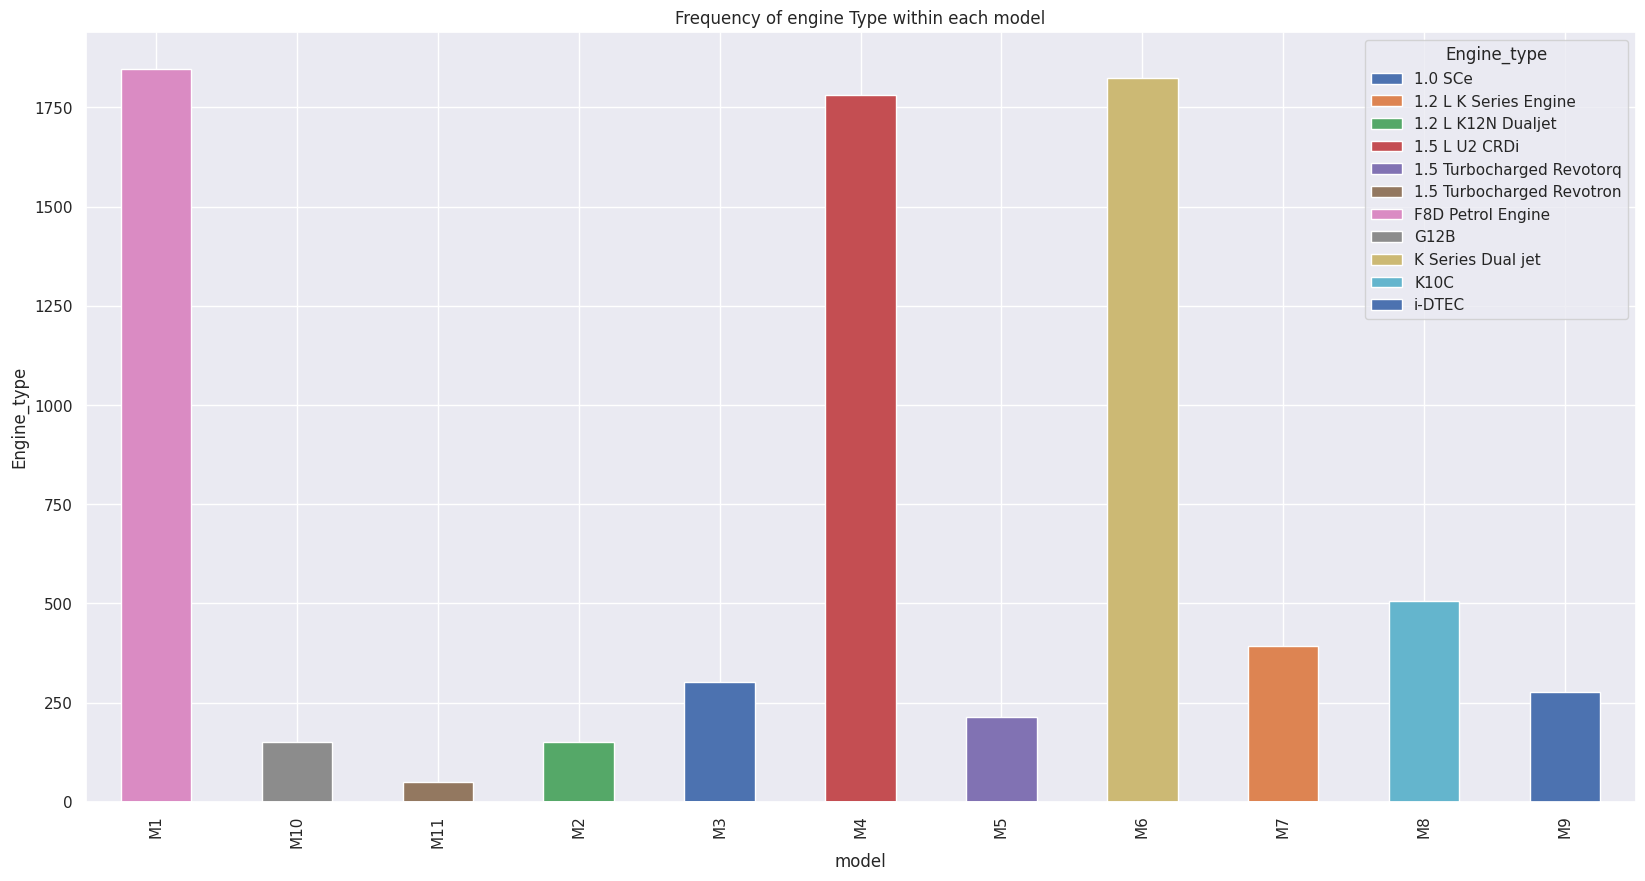

In [ ]:

counts = df.groupby(['model', 'engine_type']).size().unstack(fill_value=0)
counts.plot(kind='bar',stacked=True)
plt.xlabel('model')
plt.ylabel('Engine_type')
plt.title('Frequency of engine Type within each model')
plt.legend(title='Engine_type')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [ ]:
counts

engine_type,1.0 SCe,1.2 L K Series Engine,1.2 L K12N Dualjet,1.5 L U2 CRDi,1.5 Turbocharged Revotorq,1.5 Turbocharged Revotron,F8D Petrol Engine,G12B,K Series Dual jet,K10C,i-DTEC
model,,,,,,,,,,,
M1,0,0,0,0,0,0,1848,0,0,0,0
M10,0,0,0,0,0,0,0,152,0,0,0
M11,0,0,0,0,0,50,0,0,0,0,0
M2,0,0,150,0,0,0,0,0,0,0,0
M3,303,0,0,0,0,0,0,0,0,0,0
M4,0,0,0,1781,0,0,0,0,0,0,0
M5,0,0,0,0,213,0,0,0,0,0,0
M6,0,0,0,0,0,0,0,0,1825,0,0
M7,0,392,0,0,0,0,0,0,0,0,0


- Model and engine follows an one to one relationship

## Transmission_type and gear_type

<Axes: xlabel='transmission_type', ylabel='gear_box'>

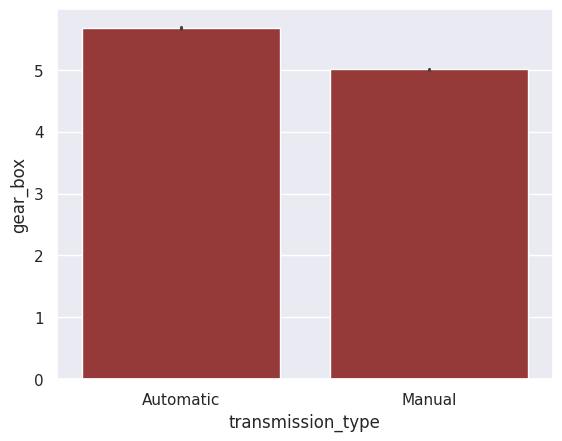

In [ ]:
sns.barplot(x='transmission_type',y='gear_box',data=df,color='brown')

- Automatic transmission type have 6 gears
- Manual transmission type have 5 gears
- Transmission type and Gear_box follows an one to one relation

## Model and numerical columns with less unique values

In [ ]:
less_num=['max_power','max_torque','displacement','airbags','cylinder','gear_box','turning_radius','gross_weight','height']

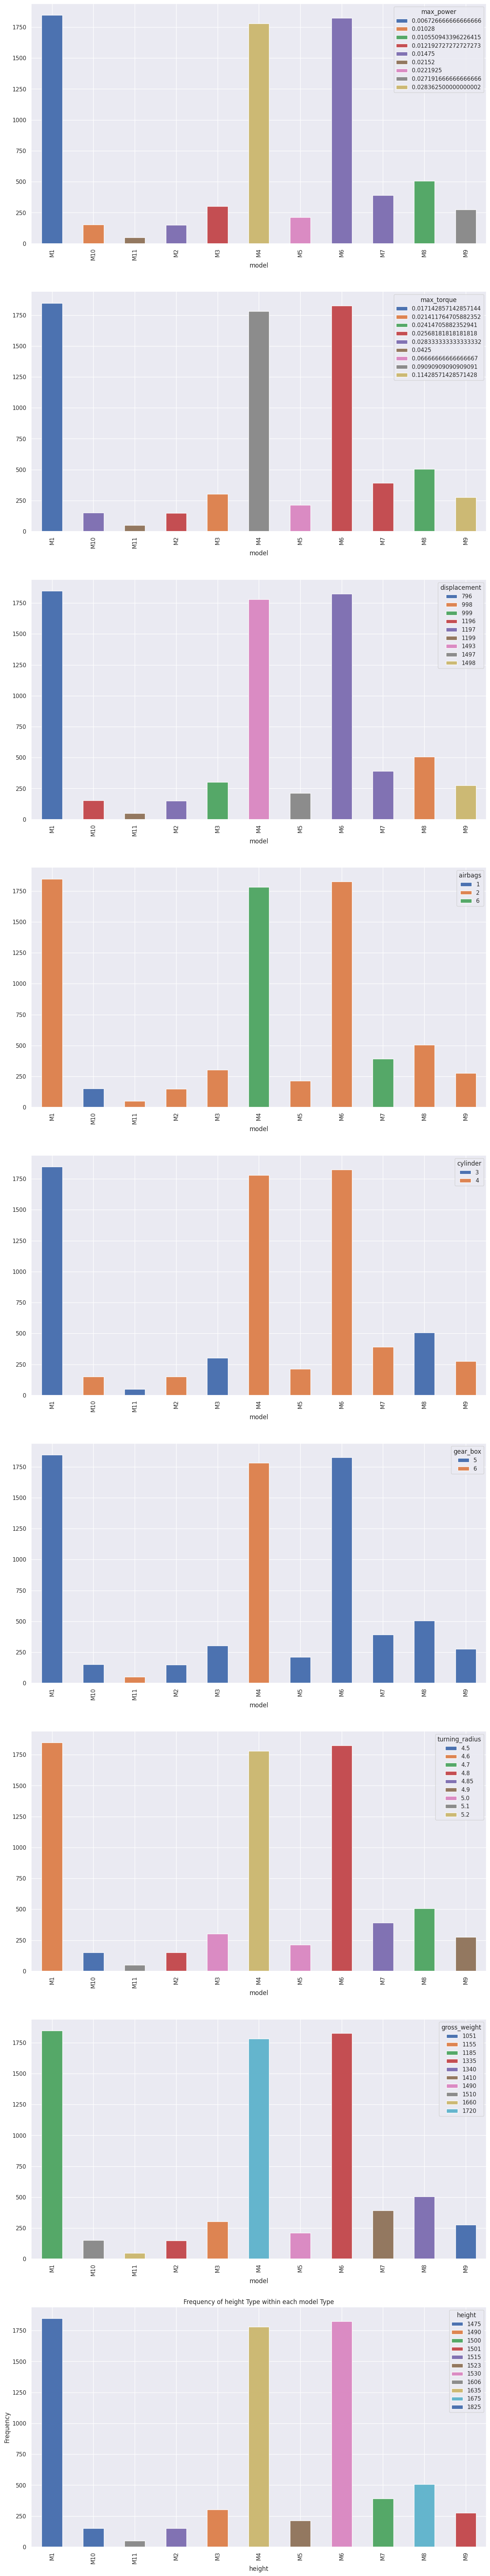

In [ ]:
rows=len(less_num)
fig,axes=plt.subplots(rows,1,figsize=(16,10*rows))
for i,col in enumerate(less_num):
  counts = df.groupby(['model', col]).size().unstack(fill_value=0)
  counts.plot(kind='bar',stacked=True,ax=axes[i])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Frequency of {col} Type within each model Type')
  #plt.legend(title='fuel_type')
plt.show()


cars of same model have same max_power, max_torque, displacement, airbags, cylinder, gear_box, turning_radius, gross_weight and  height






In [ ]:
df.groupby(['model'])['engine_type','max_power','max_torque','displacement','airbags','cylinder','gear_box','turning_radius','gross_weight','height'].value_counts()

model  engine_type                max_power  max_torque  displacement  airbags  cylinder  gear_box  turning_radius  gross_weight  height
M1     F8D Petrol Engine          0.006727   0.017143    796           2        3         5         4.60            1185          1475      1848
M10    G12B                       0.010280   0.028333    1196          1        4         5         4.50            1510          1825       152
M11    1.5 Turbocharged Revotron  0.021520   0.042500    1199          2        3         6         5.10            1660          1606        50
M2     1.2 L K12N Dualjet         0.014750   0.025682    1197          2        4         5         4.80            1335          1515       150
M3     1.0 SCe                    0.012193   0.021412    999           2        3         5         5.00            1155          1490       303
M4     1.5 L U2 CRDi              0.028363   0.090909    1493          6        4         6         5.20            1720          1635    

## Outlier Analysis

In [ ]:
outlier_col

['age_of_car', 'age_of_policyholder', 'population_density', 'gear_box']

In [ ]:
taarget=df['is_claim'].astype(object)

NameError: name 'target' is not defined

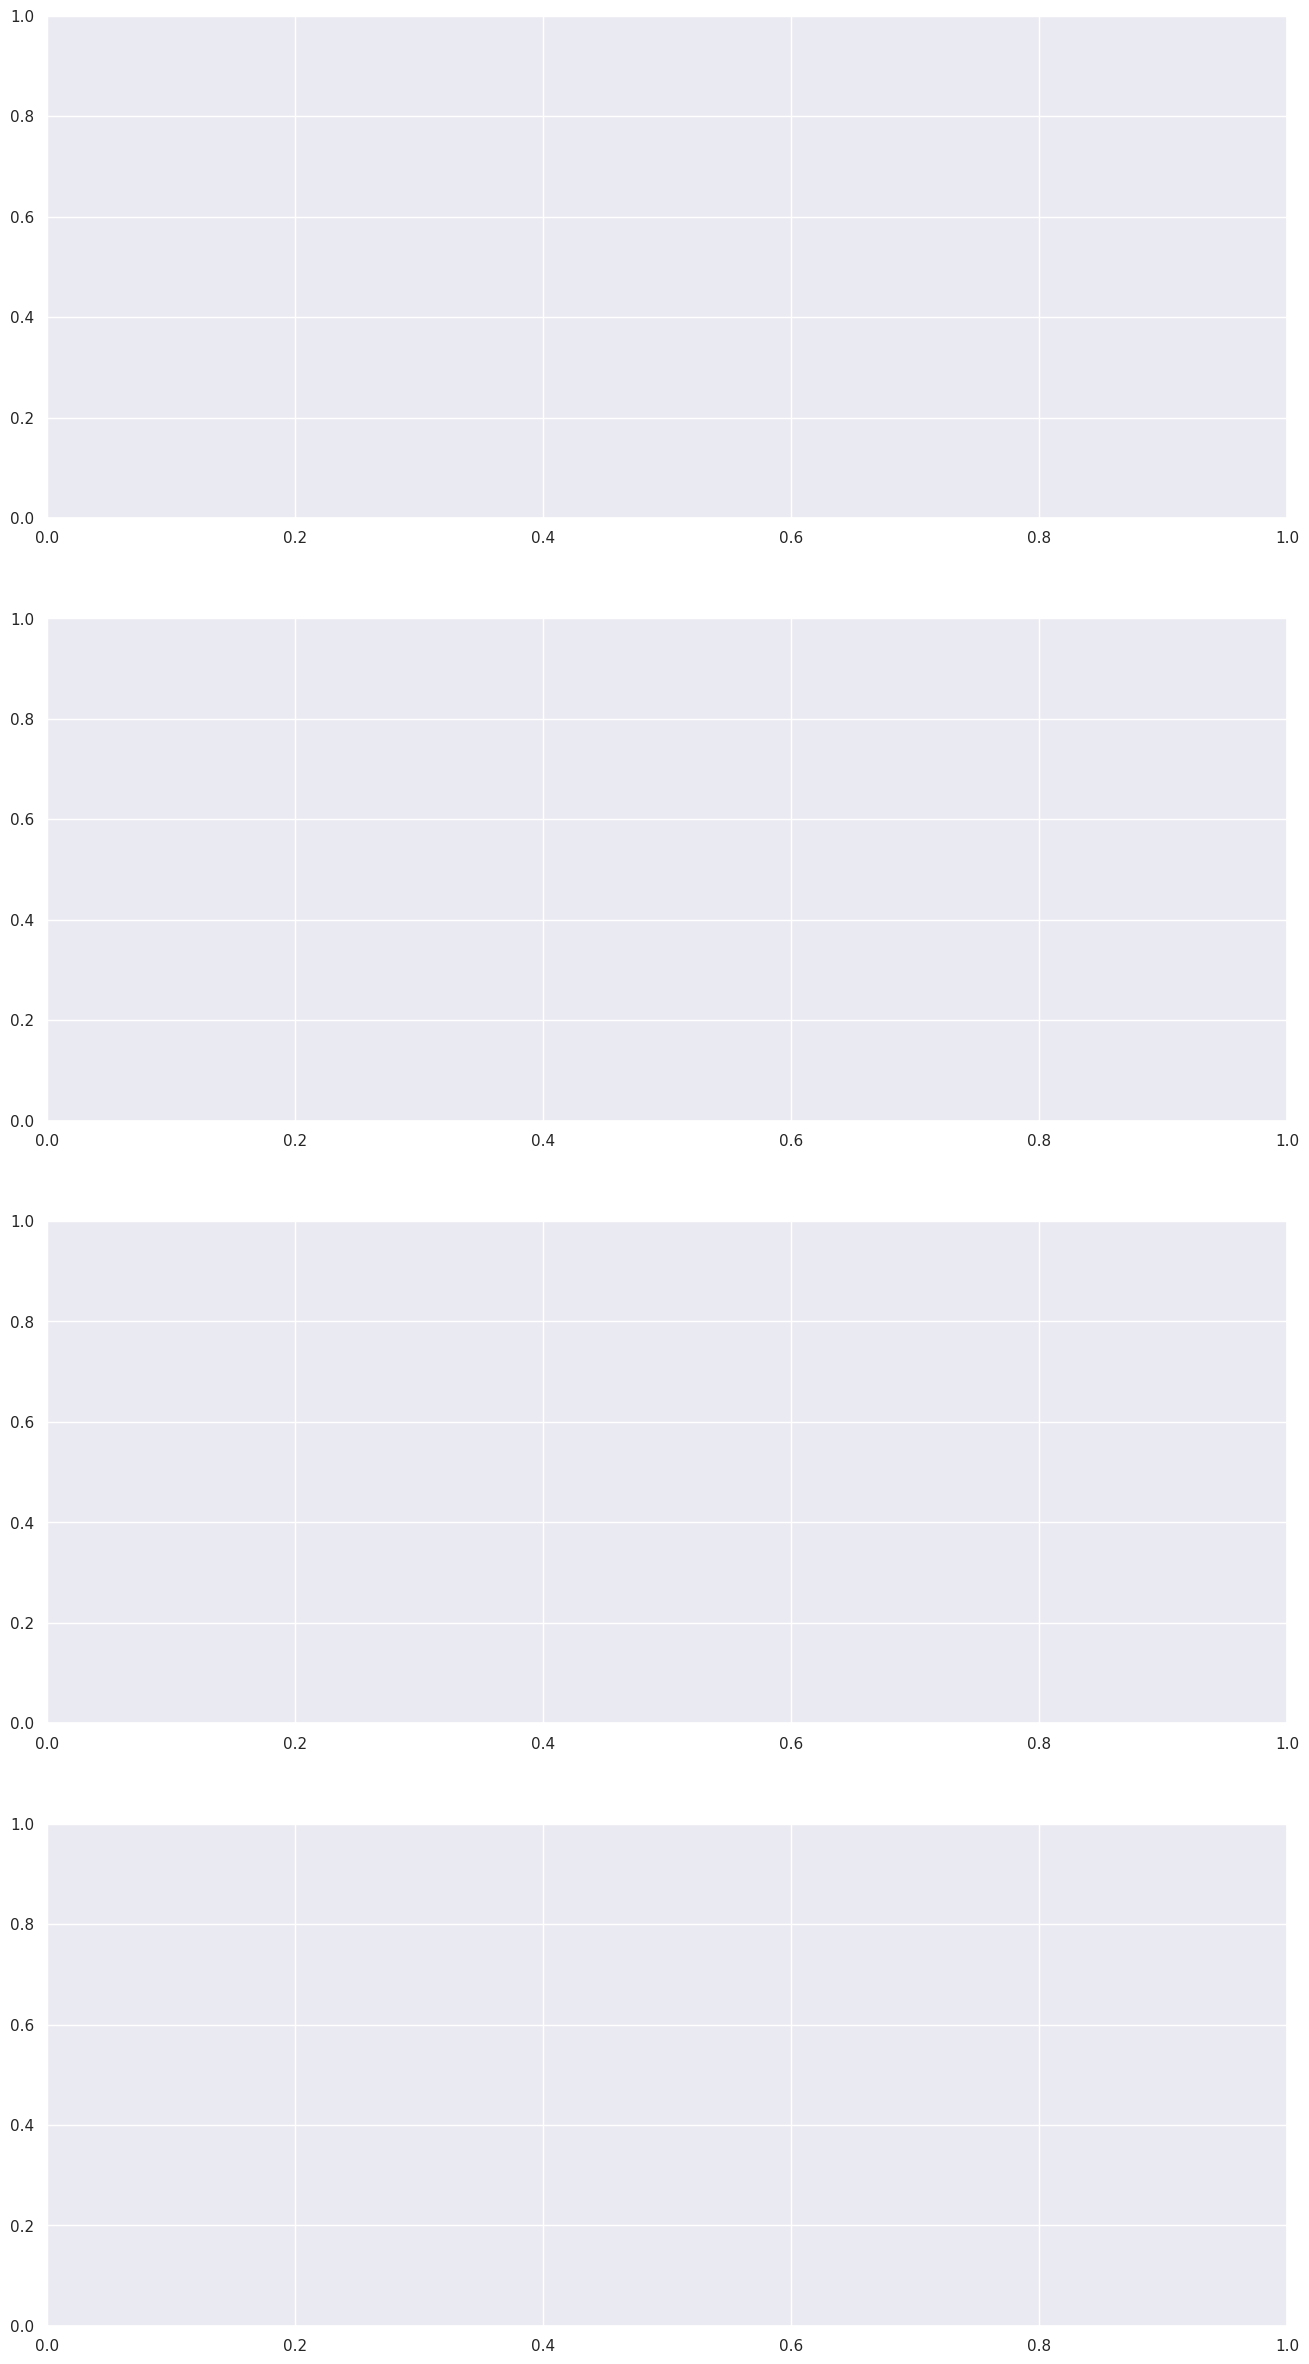

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(16,10*3))
for i,col in enumerate(outlier_col):
  sns.boxplot(y=df[col],x=target,ax=axes[i],color='brown')

# Multivariate Analysis

## Finding correlation between numerical column

<Axes: >

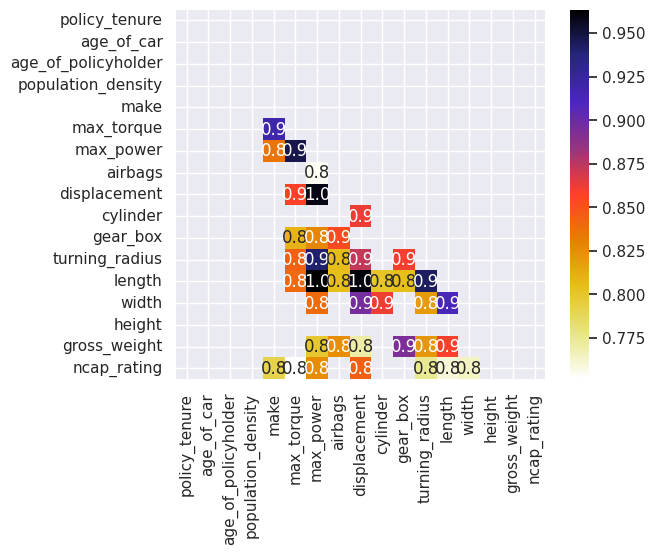

In [ ]:
#finding correlation between numerical columns
corr=df[num].corr()
corr1=corr[abs(corr)>.75]
mask=np.triu(corr)
sns.heatmap(corr1, annot=True, fmt = '.1f',mask=mask,square=True, cmap=plt.cm.CMRmap_r)


In [ ]:
#getting columns that has a correlation >0.85 with some other column
def correlated(df):
  correlation={(corr.columns[i],corr.columns[j]):corr.iloc[i,j] for i in range(len(corr)) for j in range(i) if abs(corr.iloc[i,j])>0.75}
  return correlation

In [ ]:
#printing correlated columns
correlation=correlated(df[num])
correlation=pd.Series(correlation)
correlation=correlation.sort_values(ascending=False)




<Axes: title={'center': 'correlation'}>

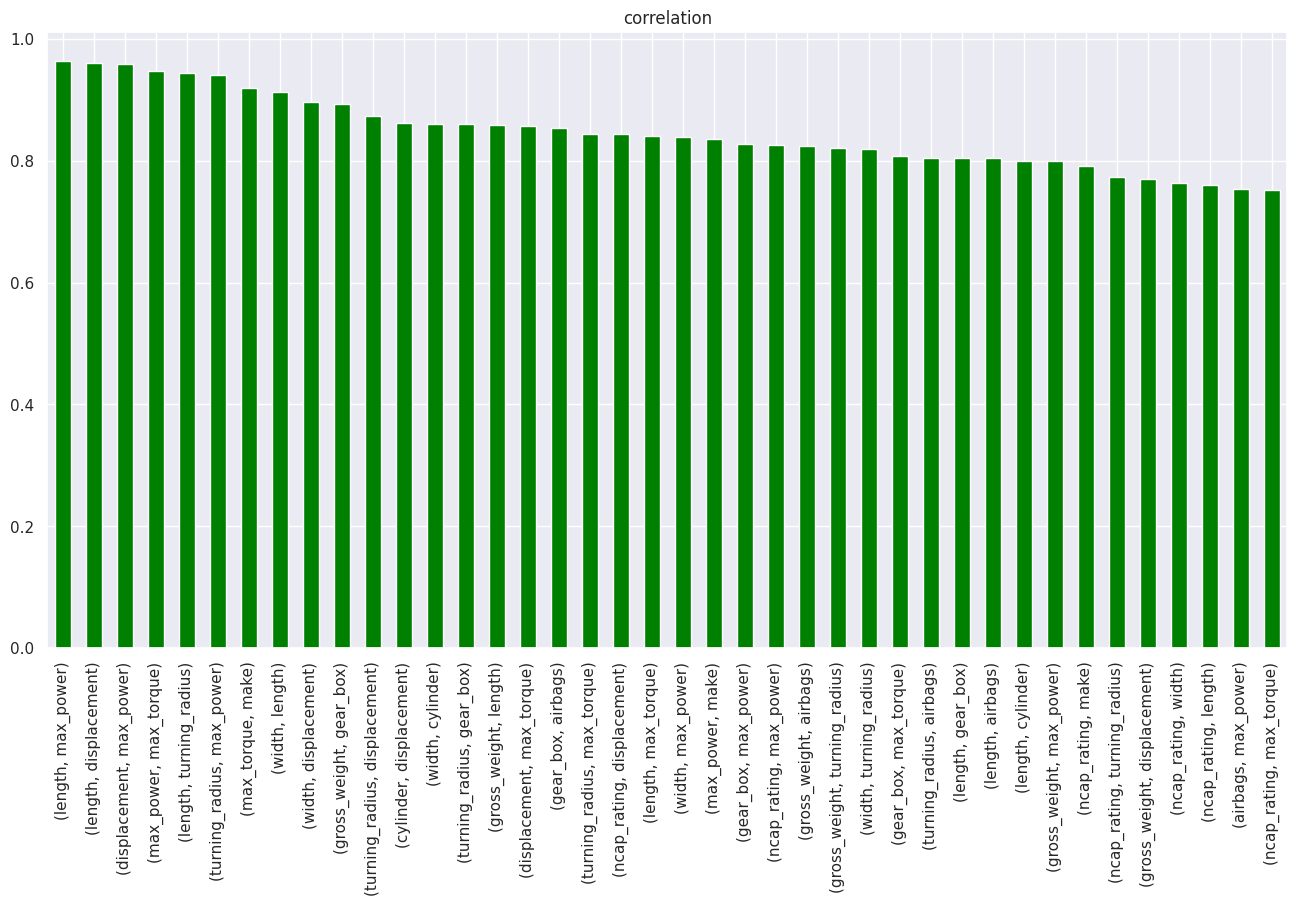

In [ ]:
#plotting correlation
plt.figure(figsize=(16,8))
correlation.plot.bar(title='correlation',color='green')

##Finding relation between categorical columns

In [ ]:
#function to findout related categorical columns
def corr_cat(df,th):
  corr={(df.columns[i],df.columns[j]):np.mean(df[df.columns[i]]==df[df.columns[j]]) for i in range(len(df.columns)) for j in range(i) }
  corr={k: corr[k] for k in corr if corr[k]>=th}
  corr_col=list({k[0] for k in corr})


  return corr,corr_col


In [ ]:
corr_dict,corr_cat_lst=corr_cat(df[bin],1)
print(corr_dict)


{('is_rear_window_washer', 'is_rear_window_wiper'): 1.0, ('is_central_locking', 'is_power_door_locks'): 1.0, ('is_ecw', 'is_power_door_locks'): 1.0, ('is_ecw', 'is_central_locking'): 1.0}


#**Preproceesing**

## Removing correlated numerical columns

In [ ]:
def correlated_col(df):
  corr_num=list({corr.columns[i] for i in range(len(corr)) for j in range(i) if abs(corr.iloc[i,j])>0.75})
  return corr_num

In [ ]:
#droping correlated columns
drop_col=correlated_col(df[num])
df.drop(drop_col, axis=1, inplace=True)


In [ ]:
#updating num
num=[i for i in num if i in df.columns]


## Removing related categorical column

In [ ]:
print(corr_cat_lst)

['is_central_locking', 'is_ecw', 'is_rear_window_washer']


In [ ]:
#can drop model and engine type because these features depends on max_power, max_torque, displacement, airbags, cylinder, gear_box, turning_radius, gross_weight and height
df.drop(corr_cat_lst,axis=1,inplace=True)
df.drop(['model','engine_type'],axis=1,inplace=True)

In [ ]:
#droping population_density as it is related to area_cluster
df.drop('population_density',axis=1,inplace=True)

In [ ]:
#updating cat list
cat=[i for i in cat if i in df.columns]

## Capping Outliers

In [ ]:
outlier_col=[i for i in outlier_col if i in df.columns]

In [ ]:
#capping outliers
for i in outlier_col:
    Q1= df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lr = Q1-(1.5*IQR)
    ur = Q3+(1.5*IQR)
    df[i]=np.where(df[i] < lr, lr, df[i])
    df[i]=np.where(df[i] > ur, ur, df[i])

## Column Transformation

In [ ]:
df['segment'].value_counts().sort_values(ascending=False)

B2         2430
A          2151
C2         1781
B1          506
C1          476
Utility     152
Name: segment, dtype: int64

In [ ]:
#transforming column
df['segment']=df['segment'].apply(lambda x:x if df['segment'].value_counts()[x]>500 else 'others')

In [ ]:
df['segment'].value_counts().sort_values(ascending=False)

B2        2430
A         2151
C2        1781
others     628
B1         506
Name: segment, dtype: int64

## Label encoding the categorical values

In [ ]:
for col in cat:
   ordinal_label = {k: i for i, k in enumerate(df[col].unique())}
   df[col] = df[col].map(ordinal_label)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('is_claim',axis=1),df['is_claim'],test_size=0.3,random_state=100)

# chi2 test to find out influence of each features on target variable

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train[cat],y_train)

In [ ]:
f_p_values

(array([3.40589200e+00, 4.77499046e-01, 6.29868401e-01, 4.40855701e-01,
        6.29868401e-01, 7.63013062e-03, 2.32788668e+00, 6.12232581e-02,
        6.25389246e+00, 4.82345846e-01, 6.12232581e-02, 2.24298231e-01,
        1.37200741e-01, 8.83080168e-01, 7.16642314e-03, 7.16642314e-03,
        6.46132240e-03, 4.13262921e-01, 3.59010512e-01, 3.59010512e-01,
        1.37668871e-01, 4.66007288e-01, 1.19008519e-06, 3.59010512e-01,
        4.29499174e+00]),
 array([0.06496398, 0.48955734, 0.42740359, 0.50670973, 0.42740359,
        0.93039282, 0.12707429, 0.80457287, 0.01239207, 0.48736166,
        0.80457287, 0.63578422, 0.71107987, 0.34735943, 0.93253589,
        0.93253589, 0.93593316, 0.520318  , 0.54905629, 0.54905629,
        0.71060956, 0.49482976, 0.99912958, 0.54905629, 0.03822478]))

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=cat
p_values

area_cluster                        0.064964
segment                             0.489557
model                               0.427404
fuel_type                           0.506710
engine_type                         0.427404
is_esc                              0.930393
is_adjustable_steering              0.127074
is_tpms                             0.804573
is_parking_sensors                  0.012392
is_parking_camera                   0.487362
rear_brakes_type                    0.804573
transmission_type                   0.635784
steering_type                       0.711080
is_front_fog_lights                 0.347359
is_rear_window_wiper                0.932536
is_rear_window_washer               0.932536
is_rear_window_defogger             0.935933
is_brake_assist                     0.520318
is_power_door_locks                 0.549056
is_central_locking                  0.549056
is_power_steering                   0.710610
is_driver_seat_height_adjustable    0.494830
is_day_nig

In [ ]:
p_values=p_values.sort_values()

In [ ]:
p_values

is_parking_sensors                  0.012392
is_speed_alert                      0.038225
area_cluster                        0.064964
is_adjustable_steering              0.127074
is_front_fog_lights                 0.347359
engine_type                         0.427404
model                               0.427404
is_parking_camera                   0.487362
segment                             0.489557
is_driver_seat_height_adjustable    0.494830
fuel_type                           0.506710
is_brake_assist                     0.520318
is_central_locking                  0.549056
is_ecw                              0.549056
is_power_door_locks                 0.549056
transmission_type                   0.635784
is_power_steering                   0.710610
steering_type                       0.711080
is_tpms                             0.804573
rear_brakes_type                    0.804573
is_esc                              0.930393
is_rear_window_wiper                0.932536
is_rear_wi

<Axes: title={'center': 'p_values'}>

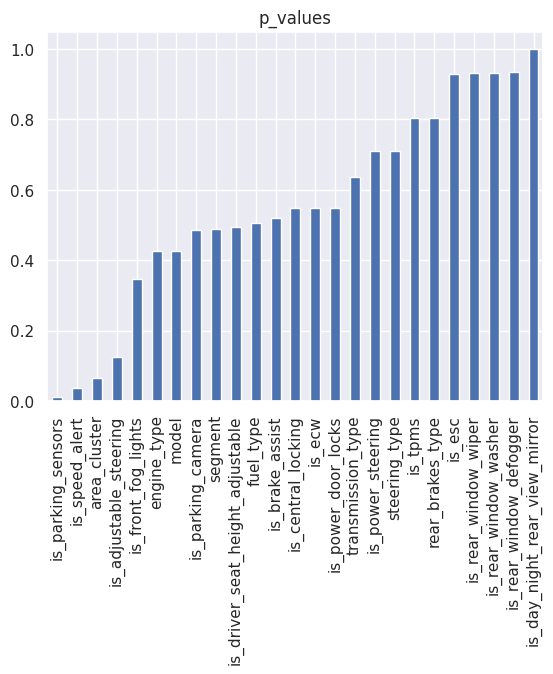

In [ ]:

p_values.plot.bar(title='p_values')

# Checking mutual information value for each feature with target column:

In [ ]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02035239, 0.00723623, 0.00328107, 0.0008014 , 0.00868367,
       0.        , 0.        , 0.        , 0.00546124, 0.00107207,
       0.00718813, 0.        , 0.00084876, 0.00330197, 0.        ,
       0.        , 0.00618183, 0.00483363, 0.        , 0.00156243,
       0.        , 0.        , 0.00346675, 0.        , 0.00418152,
       0.        , 0.        , 0.00216559, 0.00407599, 0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

policy_tenure                       0.020352
make                                0.008684
age_of_car                          0.007236
is_adjustable_steering              0.007188
steering_type                       0.006182
engine_type                         0.005461
height                              0.004834
is_central_locking                  0.004182
is_ecw                              0.004076
is_brake_assist                     0.003467
is_parking_camera                   0.003302
age_of_policyholder                 0.003281
is_day_night_rear_view_mirror       0.002166
is_rear_window_wiper                0.001562
is_esc                              0.001072
is_parking_sensors                  0.000849
area_cluster                        0.000801
segment                             0.000000
is_tpms                             0.000000
model                               0.000000
fuel_type                           0.000000
transmission_type                   0.000000
is_rear_wi

<Axes: >

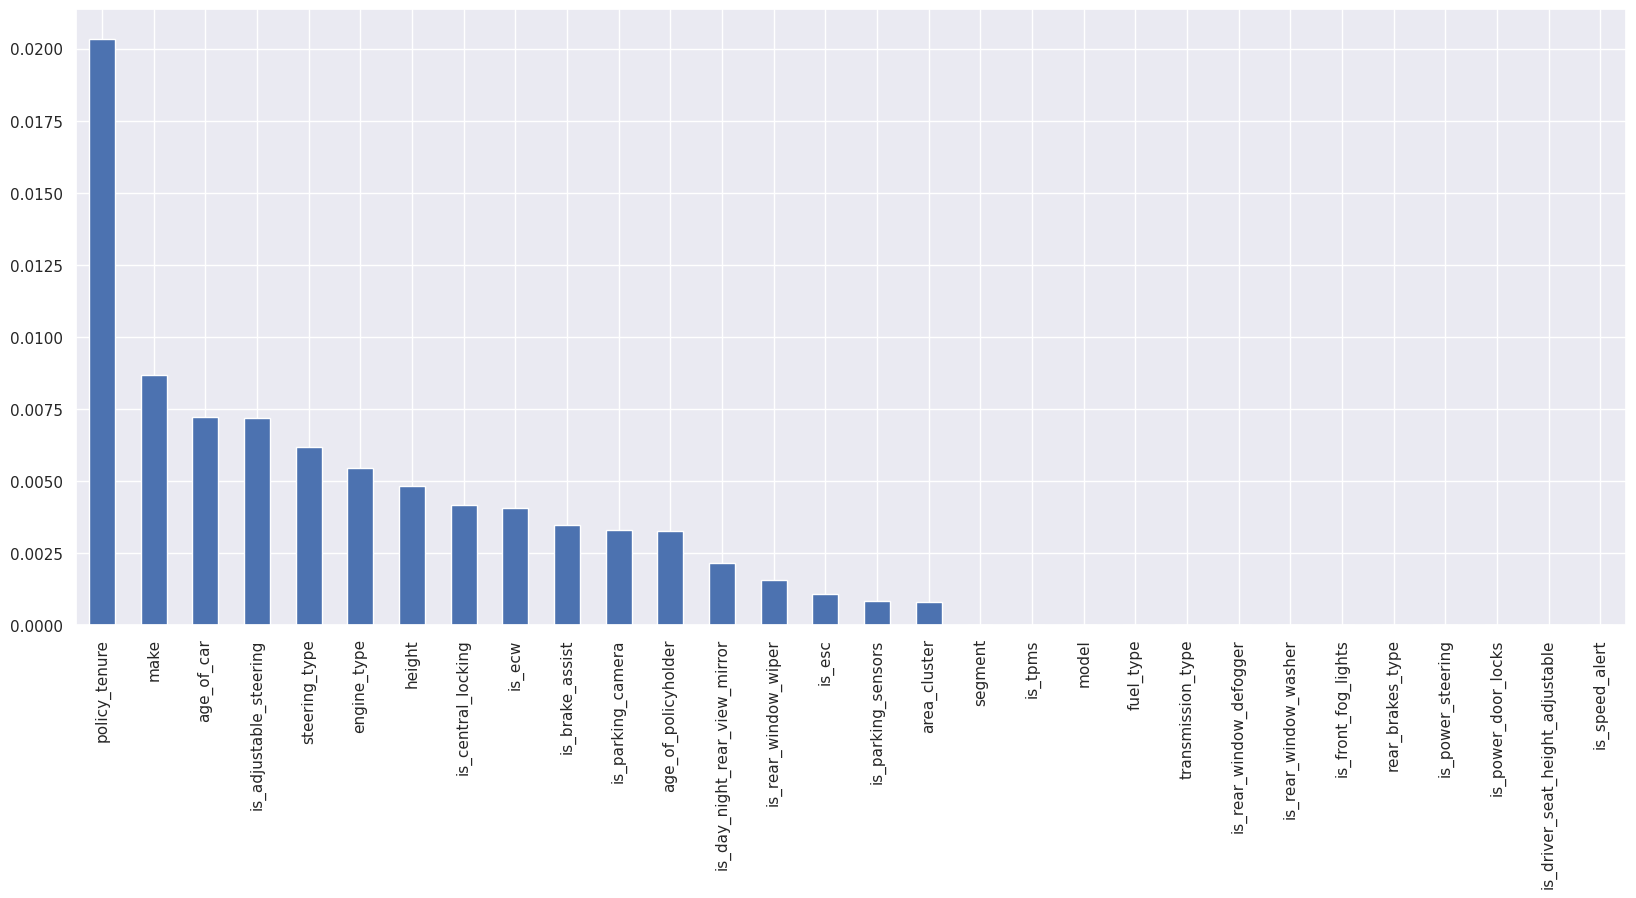

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

No features have much influence in target column.In the given features policy_tenure has more influence on target column that is also only almost 2%

In [ ]:
#droping columns which has zero mutual_information with the taregt column
mutual_info=mutual_info[mutual_info==0]

In [ ]:
drop_col=mutual_info.index

In [ ]:
#droping non significant columns
X_train.drop(drop_col,axis=1,inplace=True)
X_test.drop(drop_col,axis=1,inplace=True)

# Building the model

##Random Forest Classifier

In [ ]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

### Hyperparameter tuning for random forest

In [ ]:
param_dist = {'max_depth': [2,3,4,5,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
               'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None}


In [ ]:
#seting the best parameters given by grid search
fit_rf.set_params(criterion = 'gini',
                  max_features =None,
                  max_depth = 5,bootstrap=True)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=401,
                       random_state=42)

### Out of bag estimation

In [ ]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [ ]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

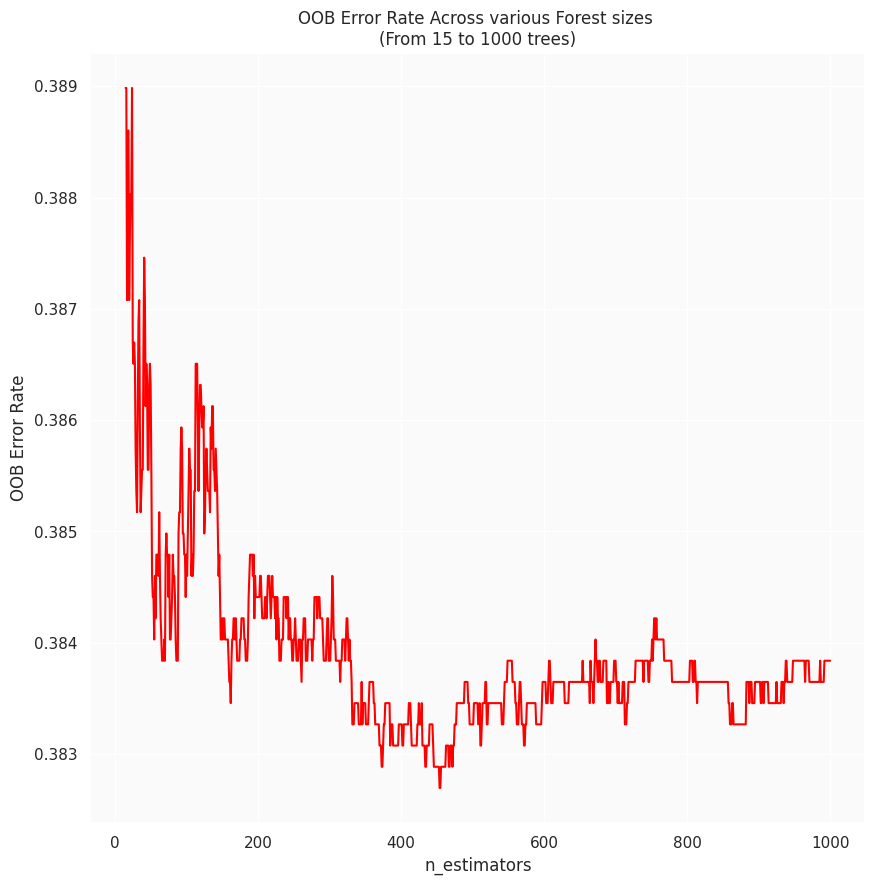

In [ ]:
#plotting n_estimators vs error_rate
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

### Training the model

In [ ]:
fit_rf.set_params(n_estimators=401,
                  bootstrap = True,
                  warm_start=False,
                  oob_score=False)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=401,
                       random_state=42)

In [ ]:

fit_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=401,
                       random_state=42)

### Feaure importance

In [ ]:
sorted_idx =fit_rf.feature_importances_.argsort()

<BarContainer object of 15 artists>

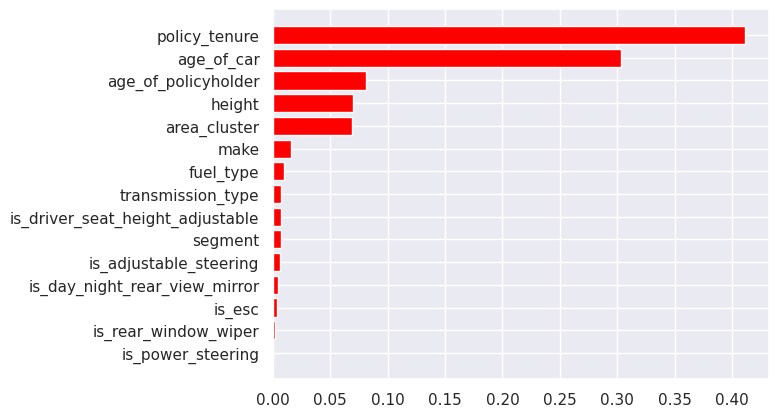

In [ ]:
plt.barh(X_train.columns[sorted_idx], fit_rf.feature_importances_[sorted_idx],color='red')

### Predictions

In [ ]:
y_pred = fit_rf.predict(X_test)

### Evaluating the model

Accuracy: 0.6073810582481103
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1131
           1       0.59      0.68      0.63      1118

    accuracy                           0.61      2249
   macro avg       0.61      0.61      0.61      2249
weighted avg       0.61      0.61      0.61      2249

[[609 522]
 [361 757]]


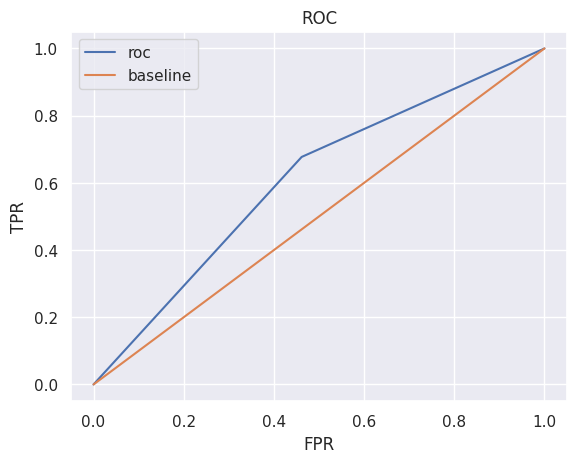

roc_auc_score: 0.6077817531305904


In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
#ploting ROC curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='roc')
plt.plot([0,1],[0,1],label='baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

#print roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,y_pred)}')

## Xgboost Classifier

### Hyperparameter tuning

In [171]:
## Hyperparameter tuning for XGBoost
param_dist = {'objective':['binary:logistic'],
               'learning_rate': [0.01, 0.1],
               'max_depth': [3, 5, 7, 10],
               'min_child_weight': [1, 3, 5],
               'subsample': [0.5, 0.7],
               'colsample_bytree': [0.5, 0.7],
               'n_estimators' : [100, 200, 500]
              }

cv_xgb = GridSearchCV(xgb.XGBClassifier(seed=42), cv = 10,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_xgb.fit(X_train, y_train)

print('Best Parameters using grid search: \n', cv_xgb.best_params_)




Best Parameters using grid search: 
 {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.5}


In [172]:

#seting the best parameters given by grid search
fit_xgb = xgb.XGBClassifier(seed=42,
                  objective='binary:logistic',
                  learning_rate=0.01,
                  max_depth=3,
                  min_child_weight=5,
                  subsample=0.5,
                  colsample_bytree=0.5,
                  n_estimators=500)


### Training the model

In [173]:
fit_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Feature Importance

<BarContainer object of 17 artists>

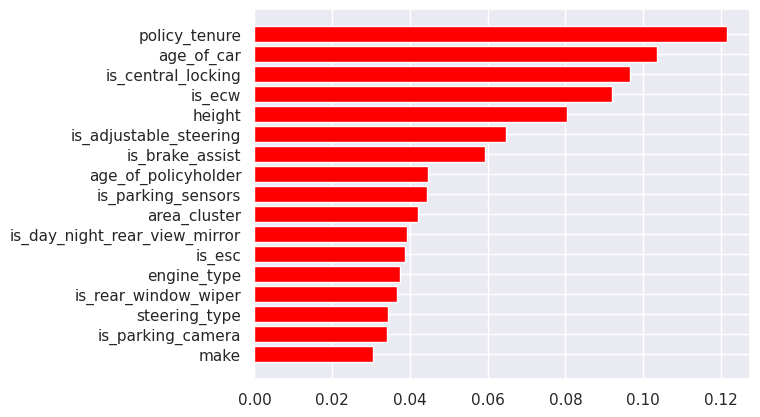

In [174]:
sorted_idx =fit_xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], fit_xgb.feature_importances_[sorted_idx],color='red')

### Predictions

In [175]:
y_pred = fit_xgb.predict(X_test)

### Evaluating the model

Accuracy: 0.614495331258337
              precision    recall  f1-score   support

           0       0.64      0.54      0.58      1131
           1       0.60      0.69      0.64      1118

    accuracy                           0.61      2249
   macro avg       0.62      0.61      0.61      2249
weighted avg       0.62      0.61      0.61      2249

[[611 520]
 [347 771]]


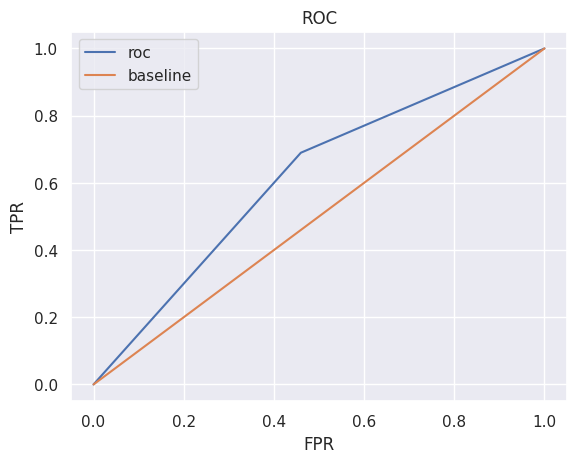

roc_auc_score: 0.6149271071083421


In [176]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
#ploting ROC curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='roc')
plt.plot([0,1],[0,1],label='baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

#print roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,y_pred)}')
